In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\FAIZAN AKHTAR\anaconda3\envs\pthon_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [4]:
df=my_dataset['train'].to_pandas()

In [5]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [6]:
import ast

In [7]:
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [8]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [9]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.

    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.

        .. versionadded:: 1.3.0
            Multi-column explode

    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.

    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.

    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns to explode is empty

In [11]:
df_exploded=df.explode('job_skills').copy()

In [12]:
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


<Axes: xlabel='job_skills'>

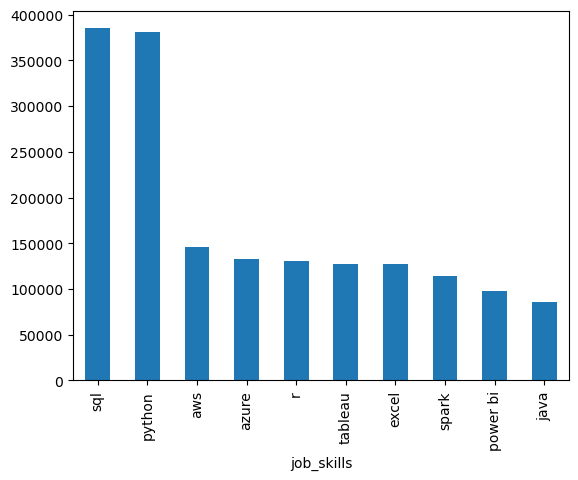

In [15]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [21]:
skills_count=df_exploded.groupby(['job_skills', 'job_title_short']).size()


In [22]:
type(skills_count)

pandas.core.series.Series

In [25]:
df_skills_count=skills_count.reset_index(name='skill_count')

In [26]:
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [29]:
df_skills_count=df_skills_count.sort_values(by='skill_count', ascending=False)

In [30]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
971,linode,Senior Data Analyst,1
969,linode,Data Engineer,1
1884,svelte,Cloud Engineer,1
927,kali,Senior Data Scientist,1


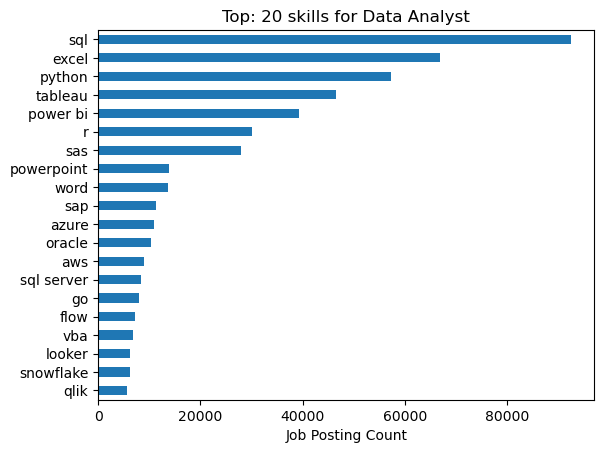

In [49]:
job_title='Data Analyst'
top_skills= 20
df_skill_final=df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills).plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f"Top: {top_skills} skills for {job_title}")
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

In [36]:
df_skill_final

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280
